In [1]:
!pip3 install skfeature-chappers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.utils import resample
from skfeature.function.similarity_based import fisher_score
import numpy as np
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [5]:
!pip3 install matplotlib
import random
import math,time,sys, os
from matplotlib import pyplot
from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [6]:
dataframe_train=pd.read_csv('PAMPA_Train_Feature.csv')
#dataframe_train.drop(dataframe_train.tail(1).index,inplace=True)
dataframe_train = dataframe_train.iloc[: , 1:]
print(dataframe_train)
y_train=pd.read_csv('PAMPA2_Train_Label.csv')
y_train

         1    2    3    4    5    6    7          8    9        10  ...  1015  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.000000  ...   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.000000  ...   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.339774  0.0  0.000000  ...   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  1.253475  ...   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  6.962507  ...   0.0   
...    ...  ...  ...  ...  ...  ...  ...        ...  ...       ...  ...   ...   
21244  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.116161  0.0  0.000000  ...   0.0   
21245  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.000000  ...   0.0   
21246  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.324249  0.0  0.000000  ...   0.0   
21247  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.000000  0.0  0.000000  ...   0.0   
21248  0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.792128  0.0  0.000000  ...   0.0   

       1016  1017  1018  10

,# label
0,8
1,10
2,2
3,0
4,2
...,...
21244,1
21245,1
21246,9
21247,11


In [7]:
coln=dataframe_train.columns
coln1=y_train.columns

In [8]:
dataframe_test=pd.read_csv('PAMPA2_Test_Feature.csv')
#dataframe_test.drop(dataframe_test.tail(1).index,inplace=True)
dataframe_test = dataframe_test.iloc[: , 1:]
print(dataframe_test)
y_test=pd.read_csv('PAMPA2_Test_Label.csv')
y_test

        1         2    3    4    5    6    7         8    9        10  ...  \
0     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
1     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  4.289337  ...   
2     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.862526  ...   
3     0.0  2.215433  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
4     0.0  0.000000  0.0  0.0  0.0  0.0  0.0  6.325282  0.0  0.000000  ...   
...   ...       ...  ...  ...  ...  ...  ...       ...  ...       ...  ...   
9102  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
9103  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
9104  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
9105  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
9106  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   

      1015  1016  1017  1018  1019  1020  1021  1022  1023  102

,# label
0,9
1,0
2,0
3,2
4,6
...,...
9102,4
9103,5
9104,4
9105,11


In [9]:
dataframe_test.columns=coln
y_test.columns=coln1

In [10]:
dataframe=dataframe_train.append(dataframe_test,ignore_index=True)
print(dataframe)
y=y_train.append(y_test,ignore_index=True)
y



         1    2    3    4    5    6    7         8    9        10  ...  1015  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.339774  0.0  0.000000  ...   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  1.253475  ...   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  6.962507  ...   0.0   
...    ...  ...  ...  ...  ...  ...  ...       ...  ...       ...  ...   ...   
30351  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   0.0   
30352  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   0.0   
30353  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   0.0   
30354  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   0.0   
30355  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   0.0   

       1016  1017  1018  1019  1020  10

/var/folders/mm/5x1dmlhj75q0js87cstkgdhm0000gr/T/ipykernel_1318/831249703.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe=dataframe_train.append(dataframe_test,ignore_index=True)
/var/folders/mm/5x1dmlhj75q0js87cstkgdhm0000gr/T/ipykernel_1318/831249703.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y_train.append(y_test,ignore_index=True)


,# label
0,8
1,10
2,2
3,0
4,2
...,...
30351,4
30352,5
30353,4
30354,11


In [11]:
cols=[]
for i in range(len(dataframe.columns)):
  col1=dataframe[dataframe.columns[i]].to_numpy()
  if(np.sum(col1)==0):
    cols.append(dataframe.columns[i])

dataframe = dataframe.drop(columns=cols)
print(dataframe.shape[1])

349


In [12]:
df=dataframe.copy()
df['labels']=y
df

,2,8,9,10,11,12,13,15,17,18,...,1001,1002,1005,1009,1010,1011,1014,1016,1019,labels
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.808711,0.000000,...,0.0,0.0,3.264911,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.392257,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10
2,0.0,1.339774,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.000000,0.0,1.253475,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.000000,0.0,6.962507,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,1.038365,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30351,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4
30352,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.674616,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5
30353,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4
30354,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2.418333,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,11


In [13]:
x=df.copy()

In [14]:
ln=df.shape[1]
str=df.columns[ln-1]
print(df)

         2         8    9        10   11   12   13        15        17  \
0      0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000  0.808711   
1      0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.392257  0.000000   
2      0.0  1.339774  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   
3      0.0  0.000000  0.0  1.253475  0.0  0.0  0.0  0.000000  0.000000   
4      0.0  0.000000  0.0  6.962507  0.0  0.0  0.0  0.000000  0.000000   
...    ...       ...  ...       ...  ...  ...  ...       ...       ...   
30351  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   
30352  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   
30353  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000   
30354  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  2.418333  0.000000   
30355  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.000000  3.231628   

             18  ...  1001  1002      1005  1009  1010  1011  1014  1016  \
0      0.000000  ...   0.0   0.0  3

In [15]:
x=x.drop([str],axis=1)
dataset=x.to_numpy()
dataset

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.3397741, 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [16]:
def sort_agents(agents, obj,train_X,val_X,train_Y,val_Y):
    # sort the agents according to fitness
    #train_X, val_X, train_Y, val_Y = data.train_X, data.val_X, data.train_Y, data.val_Y
    (obj_function, weight_acc) = obj

    # if there is only one agent
    if len(agents.shape) == 1:
        num_agents = 1
        fitness = obj_function(agents, train_X, val_X, train_Y, val_Y, weight_acc)
        return agents, fitness

    # for multiple agents
    else:
        num_agents = agents.shape[0]
        fitness = np.zeros(num_agents)
        for id, agent in enumerate(agents):
            fitness[id] = obj_function(agent, train_X, val_X, train_Y, val_Y, weight_acc)
            
        idx = np.argsort(-fitness)
        sorted_agents = agents[idx].copy()
        sorted_fitness = fitness[idx].copy()
        
    return sorted_agents, sorted_fitness


In [17]:
def compute_fitness(agent, train_X, test_X, train_Y, test_Y, weight_acc=0.99):
    # compute a basic fitness measure
    if(weight_acc == None):
        weight_acc = 0.99
    
    weight_feat = 1 - weight_acc
    num_features = len(agent)
   
    acc = compute_accuracy(agent, train_X, test_X, train_Y, test_Y)
    feat = (num_features - np.sum(agent))/num_features

    fitness = weight_acc * acc + weight_feat * feat
    
    return fitness


In [18]:
from sklearn.feature_selection import f_regression

# inputs:
#    X: pandas.DataFrame, features
#    yy: pandas.Series, target variable
#    K: number of features to select


X=x
yy=df[str].to_numpy()
K=x.shape[1]

# compute F-statistics and initialize correlation matrix
F = pd.Series(f_regression(X, yy)[0], index = X.columns)
corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

# initialize list of selected features and list of excluded features
selected = []
not_selected = X.columns.to_list()
Dict={}
# repeat K times
for i in range(K):
  
    # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
    if i > 0:
        last_selected = selected[-1]
        corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)
        
    # compute FCQ score for all the (currently) excluded features (this is Formula 2)
    score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)
    
    # find best feature, add it to selected and remove it from not_selected
    # print(score[score.argmax()])
    # print(score.max())
    # print(score.index[score.argmax()])
    best = score.index[score.argmax()]
    selected.append(best)
    not_selected.remove(best)
    Dict[best]=score.max()

mrMr=[]
for i in range(x.shape[1]):
  mrMr.append(Dict[x.columns[i]])
#print(mrMr)  

In [19]:
for i in range(len(mrMr)):
  mrMr[i]=mrMr[i]/(max(mrMr))

In [20]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

In [21]:
!pip3 install Py-FS
def fitness_score_values(data,target):
    from Py_FS.filter import PCC as PCC
    from Py_FS.filter import MI as MI
    from sklearn.feature_selection import mutual_info_classif
    from Py_FS.filter import Relief as Relief
    from sklearn.feature_selection import chi2
    
    print(data)
    print(target)
    #print('Pcc scores')
    #PCC_solution = PCC(data, target)
    #print(PCC_solution.scores)
    print('MI scores')
    mi_scores=mutual_info_classif(data, target, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
    print((mi_scores))
    
    print('Relief scores')
    Relief_solution = Relief(data, target)
    print((Relief_solution.scores))
    
    
        
   
    shapley=[]
    b=x.shape[1]
    print(b)
    for i in range(b):
        shapley.append((mi_scores[i]+mrMr[i]+Relief_solution.scores[i])/3)
    return shapley

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [22]:
target=df[str].to_numpy()
print(target)


[ 8 10  2 ...  4 11  8]


In [23]:
!pip3 install tabulate
!pip3 install ReliefF
score=fitness_score_values(x.values,target)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.3397741 0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]
[ 8 10  2 ...  4 11  8]
MI scores
[4.89956286e-02 9.22808786e-02 1.23656116e-02 5.57484491e-02
 4.66296059

In [30]:
def compute_accuracy(agent, train_X, test_X, train_Y, test_Y): 
    # compute classification accuracy of the given agents
    fitness=0
    number=0
    # print(len(agent))
    # print(len(score))
    for i in range(len(agent)):
        if agent[i]==1:
            number=number+1
            fitness=fitness+score[i]
           
    if number==0:
      return 0
    return fitness/number        

In [31]:
def cal(agent): 
    # compute classification accuracy of the given agents
    fitness=0
    number=0
    for i in range(len(agent)):
        if agent[i]==1:
            number=number+1
            fitness=fitness+score[i]
           
    if number==0:
     return 0,0
    return fitness,number  

In [32]:
def initialize(popSize,dim):
	population=np.zeros((popSize,dim))
	minn = 1
	maxx = math.floor(0.8*dim)
	if maxx<minn:
		minn = maxx

	for i in range(popSize):
		random.seed(i**3 + 10 + time.time() ) 
		no = random.randint(minn,maxx)
		if no == 0:
			no = 1
		random.seed(time.time()+ 100)
		pos = random.sample(range(0,dim-1),no)
		for j in pos:
			population[i][j]=1

		# print(population[i])  
	return population

 
def fitness(solution, trainX, trainy, testX,testy):
	cols=np.flatnonzero(solution)
	val=1
	if np.shape(cols)[0]==0:
		return val	
	clf=KNeighborsClassifier(n_neighbors=5)
	train_data=trainX[:,cols]
	test_data=testX[:,cols]
	clf.fit(train_data,trainy)
	error=1-clf.score(test_data,testy)

	#in case of multi objective  []
	featureRatio = (solution.sum()/np.shape(solution)[0])
	val=omega*error+(1-omega)*featureRatio
	# print(error,featureRatio,val)
	return val

def allfit(population, trainX,  trainy,testX, testy):
	x=np.shape(population)[0]
	acc=np.zeros(x)
	for i in range(x):
		acc[i]=fitness(population[i],trainX,trainy,testX,testy)     
		#print(acc[i])
	return acc


def selectParentRoulette(popSize,fitness):
    # Perform roulette wheel selection
    maximum = sum([f for f in fitness])
    selection_probs = [f/maximum for f in fitness]
    return np.random.choice(len(fitness), p=selection_probs)


def randomwalk(agent,agentFit):
	percent = 30
	percent /= 100
	neighbor = agent.copy()
	size = np.shape(agent)[0]
	upper = int(percent*size)
	if upper <= 1 or upper>size:
		upper = size
	x = random.randint(1,upper)
	pos = random.sample(range(0,size - 1),x)
	for i in pos:
		neighbor[i] = 1 - neighbor[i]
	return neighbor

def adaptiveBeta(agent,agentFit, trainX, trainy,testX,testy):
	bmin = 0.1 #parameter: (can be made 0.01)
	bmax = 1
	maxIter = 10 # parameter: (can be increased )
	maxIter = int(max(10,10*agentFit))


	for curr in range(maxIter):
		neighbor = agent.copy()
		size = np.shape(agent)[0]
		neighbor = randomwalk(neighbor,agentFit)

		beta = bmin + (curr / maxIter)*(bmax - bmin)
		for i in range(size):
			random.seed( time.time() + i )
			if random.random() <= beta:
				neighbor[i] = agent[i]
		neighFit = fitness(neighbor,trainX,trainy,testX,testy)
		if neighFit <= agentFit:
			agent = neighbor.copy()
			agentFit = neighFit
	return (agent,agentFit)

#============================================================================
def geneticAlgo(dataset,popSize,maxIter,randomstate):

	#--------------------------------------------------------------------
	(a,b)=np.shape(df)
	print(a,b)
	data = df.values[:,0:b-1]
	#print(data)
	label=target

  

	print(label)
	dimension = np.shape(data)[1] #solution dimension
	#---------------------------------------------------------------------

	# cross = 5
	# test_size = (1/cross)
	per=0.3
	trainX, testX, trainy, testy = train_test_split(data, label ,stratify=label ,test_size=per,random_state=42) 

  
	x_axis = []
	y_axis = []
	population = initialize(popSize,dimension)
  
	print(population)
	GBESTSOL = np.zeros(np.shape(population[0]))
	GBESTFIT = -1000



	

	start_time = datetime.now()
  
	for currIter in range(1,maxIter):
		newpop = population
		#newpop = np.zeros((popSize,dimension))
	

		obj_function=compute_fitness
		weight_acc = None
		obj=(obj_function, weight_acc)
	  
		population,fitList=sort_agents(population,obj,trainX,trainy,testX,testy)
	
	  

		bestInx = np.argmax(fitList)
		fitBest = max(fitList)
		print(currIter,'best:',fitBest,population[bestInx].sum())
	  
		# print(population[bestInx])
		if fitBest > GBESTFIT:
			GBESTSOL = population[bestInx].copy()
			GBESTFIT = fitBest
		#print(fitList)
		for selectioncount in range(int(popSize/2)):
			parent1 = selectParentRoulette(popSize,fitList)
			parent2 = parent1
			while parent2 == parent1:
				random.seed(time.time())
				# parent2 = random.randint(0,popSize-1)
				parent2 = selectParentRoulette(popSize,fitList)

				# print(parent2)
			# print('parents:',parent1,parent2)
			parent1 = population[parent1].copy()
			parent2 = population[parent2].copy()
			#cross over between parent1 and parent2
			child1 = parent1.copy()
			child2 = parent2.copy()
			for i in range(dimension):
				random.seed(time.time())
				if random.uniform(0,1)<crossoverprob:
					child1[i]=parent2[i]
					child2[i]=parent1[i]
			i = selectioncount
			j = int(i+(popSize/2))
			# print(i,j)
			newpop[i]=child1.copy()
			newpop[j]=child2.copy()
	 

    
		mutationprob = muprobmin + (muprobmax - muprobmin)*(currIter/maxIter)
		for i in range(popSize):
			for k in range(1):
				fit,no=cal(newpop[i])
				for j in range(dimension):
					if random.uniform(0,1)>mutationprob:
					 	continue		
					if no==0 or newpop[i][j]==0 and score[j]>(fit/no):
						newpop[i][j]=1
						fit=fit+score[j]
						no=no+1
					if newpop[i][j]==1 and score[j]<(fit/no):
						newpop[i][j]=0
						fit=fit-score[j]
						no=no-1
	  
		

      
    

		population = newpop.copy()

	# pyplot.plot(x_axis,y_axis)
	# pyplot.show()

	#test accuracy
	cols = np.flatnonzero(GBESTSOL)
	val = 1
	if np.shape(cols)[0]==0:
		return GBESTSOL
	clf = KNeighborsClassifier(n_neighbors=5)
	train_data = trainX[:,cols]
	test_data = testX[:,cols]
	clf.fit(train_data,trainy)
	val = clf.score(test_data,testy)
	return GBESTSOL,val,test_data,testy,train_data,trainy

In [33]:
popSize = 5
maxIter = 5
omega = 0.9
crossoverprob = 0.8
muprobmin = 0.01
muprobmax = 0.05
datasetList = ["Dataset"]
randomstateList=[15,5,15,26,12,7,10,8,37,19,35,2,49,26,1,25,47,12]

In [34]:
def ga_final_vector():
  for datasetinx in range(1): 
    dataset=datasetList[datasetinx]
    best_accuracy = -100
    best_no_features = 100
    best_answer = []
    accuList = []
    featList = []
    for count in range(15):
      if (dataset == "WaveformEW" or dataset == "KrvskpEW") : #and count>2 :
        break
      print(count)
      answer,testAcc,testX,testy,trainX,trainy = geneticAlgo(dataset+".csv",popSize,maxIter,randomstateList[datasetinx])
      print(testAcc,answer.sum())
      accuList.append(testAcc)
      featList.append(answer.sum())
      if testAcc>=best_accuracy and answer.sum()<best_no_features:
        best_accuracy = testAcc
        best_no_features = answer.sum()
        best_answer = answer.copy()
        testX_final=testX
        testy_final=testy
        trainX_final=trainX
        trainy_final=trainy
      if testAcc>best_accuracy:
        best_accuracy = testAcc
        best_no_features = answer.sum()
        best_answer = answer.copy()
        testX_final=testX
        testy_final=testy
        trainX_final=trainX
        trainy_final=trainy



    print(dataset,"best:",best_accuracy,best_no_features,best_answer)
    return best_answer,trainX_final,trainy_final,testX_final,testy_final

In [35]:
ga,trainX_final,trainy_final,testX_final,testy_final=ga_final_vector()

0
30356 350
[ 8 10  2 ...  4 11  8]
[[0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1 best: 0.31272317998257415 114.0
2 best: 0.3173933247381369 112.0
3 best: 0.3085841104730064 116.0
4 best: 0.31214599079216937 124.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.945206983638959 112.0
1
30356 350
[ 8 10  2 ...  4 11  8]
[[0. 0. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]]
1 best: 0.31384703373352146 15.0
2 best: 0.3020023494352924 217.0
3 best: 0.30308815948603346 226.0
4 best: 0.30590318491559604 225.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.4829252223564291 15.0
2
30356 350
[ 8 10  2 ...  4 11  8]
[[1. 0. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 1. 0.]]
1 best: 0.3030456922165387 80.0
2 best: 0.301117236429904 170.0
3 best: 0.3028951084478177 184.0
4 best: 0.305622371554517 181.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9660700560008785 181.0
3
30356 350
[ 8 10  2 ...  4 11  8]
[[0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]]
1 best: 0.3097862470682158 74.0
2 best: 0.30943367786699133 135.0
3 best: 0.3084215844946584 148.0
4 best: 0.31361403643415336 97.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9405951465905348 97.0
4
30356 350
[ 8 10  2 ...  4 11  8]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
1 best: 0.30726122211483503 43.0
2 best: 0.30881379119959845 45.0
3 best: 0.3109548365160512 46.0
4 best: 0.315855727444115 51.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.875260788404524 51.0
5
30356 350
[ 8 10  2 ...  4 11  8]
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]]
1 best: 0.3060608063361757 167.0
2 best: 0.31042454885865106 101.0
3 best: 0.3100070428546679 124.0
4 best: 0.31397419724864944 139.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9617876358844845 139.0
6
30356 350
[ 8 10  2 ...  4 11  8]
[[0. 0. 0. ... 1. 1. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]
1 best: 0.30801824846144626 181.0
2 best: 0.30972668383426866 71.0
3 best: 0.3076373360398622 80.0
4 best: 0.30851298301738994 110.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9325793345777973 71.0
7
30356 350
[ 8 10  2 ...  4 11  8]
[[0. 0. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 0. 0.]]
1 best: 0.3021113010833193 205.0
2 best: 0.30343937218203415 127.0
3 best: 0.30682842002589633 135.0
4 best: 0.3090902557643846 139.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9561875480399693 139.0
8
30356 350
[ 8 10  2 ...  4 11  8]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]]
1 best: 0.30763814975411796 136.0
2 best: 0.30850754833733013 125.0
3 best: 0.3110374369091031 118.0
4 best: 0.31188234303808476 135.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9597013286482925 135.0
9
30356 350
[ 8 10  2 ...  4 11  8]
[[1. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1 best: 0.35417562882866754 3.0
2 best: 0.36031757213010407 2.0
3 best: 0.3653356238482507 3.0
4 best: 0.4294011106341179 5.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.2934006807949929 5.0
10
30356 350
[ 8 10  2 ...  4 11  8]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]]
1 best: 0.428105999591432 2.0
2 best: 0.3021651620688006 41.0
3 best: 0.30750307393859033 79.0
4 best: 0.3111788401763533 108.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.1036565279455364 2.0
11
30356 350
[ 8 10  2 ...  4 11  8]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]]
1 best: 0.3071034880165709 104.0
2 best: 0.303008080378108 135.0
3 best: 0.3043338307434953 118.0
4 best: 0.30714091296093865 129.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.953771823871747 129.0
12
30356 350
[ 8 10  2 ...  4 11  8]
[[1. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]]
1 best: 0.3038442228872667 151.0
2 best: 0.3045007967445073 151.0
3 best: 0.30649560812714166 152.0
4 best: 0.30864941921027605 144.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9605797738003733 144.0
13
30356 350
[ 8 10  2 ...  4 11  8]
[[1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 1. 0.]]
1 best: 0.3080525368418938 148.0
2 best: 0.30927110521842605 151.0
3 best: 0.30996812038167093 151.0
4 best: 0.3127120156260237 150.0


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9571757988360602 150.0
14
30356 350
[ 8 10  2 ...  4 11  8]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 0. 0.]]
1 best: 0.3162446449272675 131.0
2 best: 0.30667385683927395 171.0
3 best: 0.30494612463974835 222.0
4 best: 0.30769900386801236 210.0
0.9557483254639288 131.0
Dataset best: 0.9660700560008785 181.0 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0

/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[ 2 10  2 ... 11  4  4]


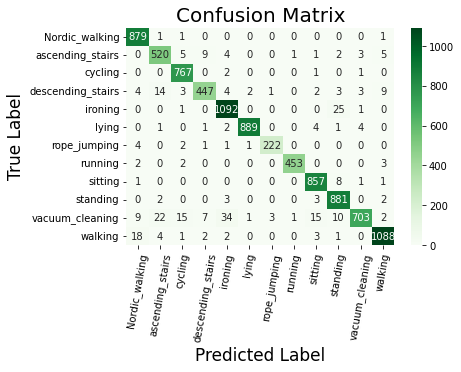

<Figure size 8640x8640 with 0 Axes>

In [38]:
!pip3 install seaborn
import seaborn as sn
import matplotlib.pyplot as plt

classes_= np.array(['Nordic_walking', 'ascending_stairs', 'cycling','descending_stairs', 'ironing','lying', 
                   'rope_jumping', 'running','sitting', 'standing', 'vacuum_cleaning', 'walking'], dtype=object)
!pip3 install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(trainX_final,trainy_final)
y_pred = clf.predict(testX_final)
print(y_pred)
mat = confusion_matrix(testy_final, y_pred)

# pd.DataFrame(testy_final).to_csv("testy.csv")
# pd.DataFrame(y_pred).to_csv("y_pred.csv")
# print(mat)
res=sn.heatmap(mat, cmap='Greens', annot=True, fmt='d')

plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5], classes_,rotation=0,fontsize=10)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5], classes_,rotation=80,fontsize=10)


plt.title('Confusion Matrix',fontsize=20)
plt.xlabel("Predicted Label",fontsize=17)
plt.ylabel("True Label",fontsize=17)
plt.figure(figsize=(120,120))
plt.show()

plt.close()


In [40]:
from sklearn.metrics import classification_report
classes_= ['Nordic_walking', 'ascending_stairs', 'cycling','descending_stairs', 'ironing','lying', 
                   'rope_jumping', 'running','sitting', 'standing', 'vacuum_cleaning', 'walking']
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(trainX_final,trainy_final)
y_pred = clf.predict(testX_final)
report=classification_report(testy_final,y_pred,target_names=classes_)
print(report)

                   precision    recall  f1-score   support

   Nordic_walking       0.96      1.00      0.98       882
 ascending_stairs       0.92      0.95      0.93       550
          cycling       0.96      0.99      0.98       771
descending_stairs       0.96      0.91      0.93       492
          ironing       0.95      0.98      0.97      1119
            lying       1.00      0.99      0.99       902
     rope_jumping       0.98      0.96      0.97       231
          running       1.00      0.98      0.99       460
          sitting       0.97      0.99      0.98       868
         standing       0.95      0.99      0.97       891
  vacuum_cleaning       0.98      0.86      0.91       822
          walking       0.98      0.97      0.98      1119

         accuracy                           0.97      9107
        macro avg       0.97      0.96      0.96      9107
     weighted avg       0.97      0.97      0.97      9107



/Users/sksabbir/Library/Python/3.8/lib/python/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
